# Stock Investment Portfolio

## Risk and Return

https://www.investopedia.com/terms/r/riskreturntradeoff.asp

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [13]:
# input
symbols = ['AMGN', 'RSLS', 'SCYX']
start = '2014-01-01'
end = '2024-01-11'

In [14]:
df = pd.DataFrame()
data = []

for symbol in symbols:
    stock_data = yf.download(symbol, actions=True, start=start, end=end)
    
    # Rename the 'Adj Close' column with the symbol to avoid duplicates
    stock_data.rename(columns={'Adj Close': f'{symbol}_Adj_Close'}, inplace=True)
    
    if df.empty:
        df = pd.DataFrame(stock_data[f'{symbol}_Adj_Close'])
    else:
        df = df.merge(pd.DataFrame(stock_data[f'{symbol}_Adj_Close']),
                      left_index=True, right_index=True, how='outer', suffixes=('', f'_{symbol}'))

    # Appends tickers which have data
    data.append(symbol)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,LLY,AZN,NVO
Date,,,
2014-01-02,40.850033,20.689379,12.426380
2014-01-03,41.147968,20.791817,12.592868
2014-01-06,41.494228,20.802416,12.557674
2014-01-07,41.220448,20.668184,12.728224
2014-01-08,41.156017,20.671717,12.814850


In [16]:
df.describe()

,LLY,AZN,NVO
count,2523.000000,2523.000000,2523.000000
mean,158.648114,40.202622,32.222347
std,133.627267,15.828145,21.693382
min,40.850033,20.668184,12.084274
25%,69.322762,26.078030,18.859626
50%,103.078857,34.042194,21.244644
75%,224.086975,53.746275,40.498833
max,630.190002,75.315445,108.669998


## Calculate Stock Returns

In [17]:
from IPython.display import Latex, HTML

Latex(r"""\begin{eqnarray}r_t = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}} = \frac{AdjClose_t}{AdjClose_{t-1}} - 1
\end{eqnarray}""")

<IPython.core.display.Latex object>

([<matplotlib.axis.YTick at 0x7f840775cce0>,
 [Text(0, 0, 'LLY'), Text(0, 1, 'AZN'), Text(0, 2, 'NVO')])

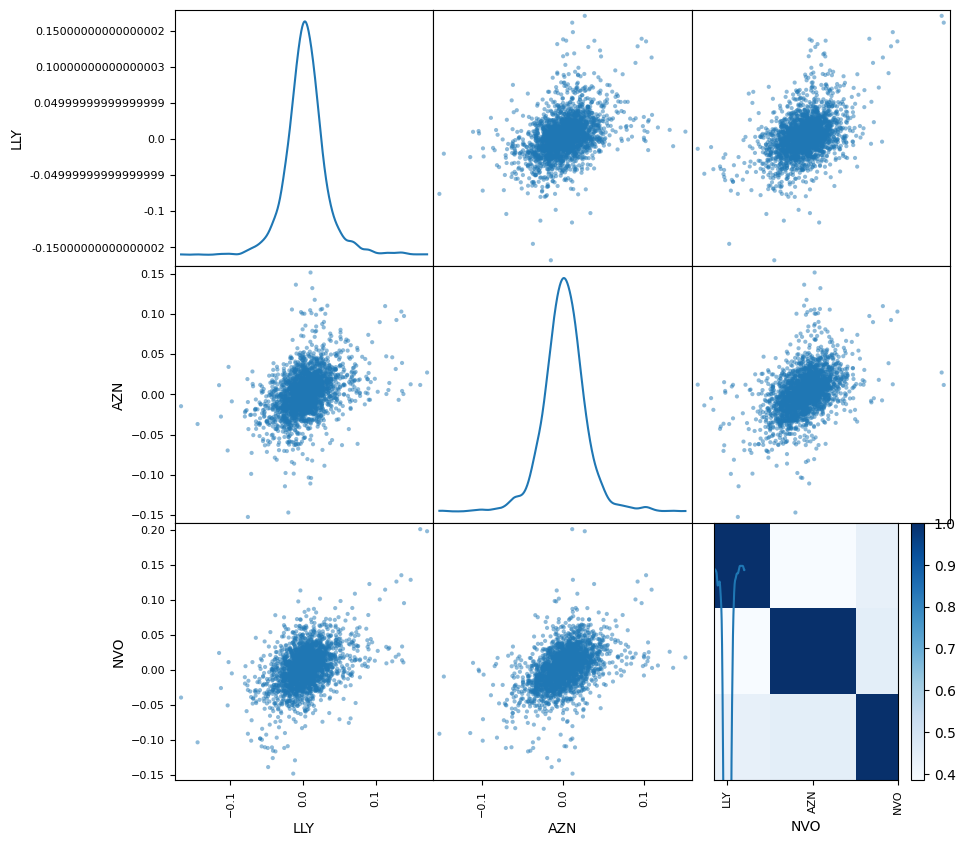

In [18]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

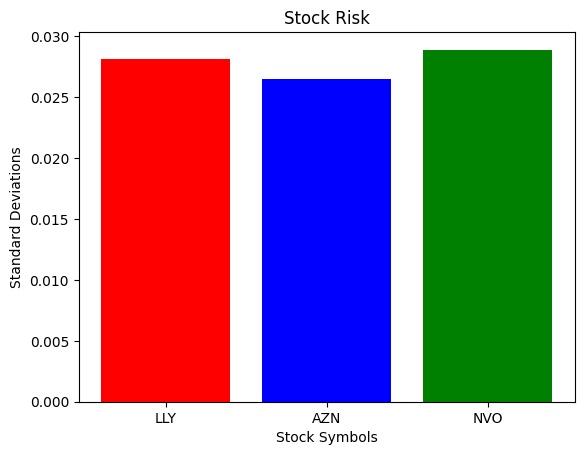

In [19]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

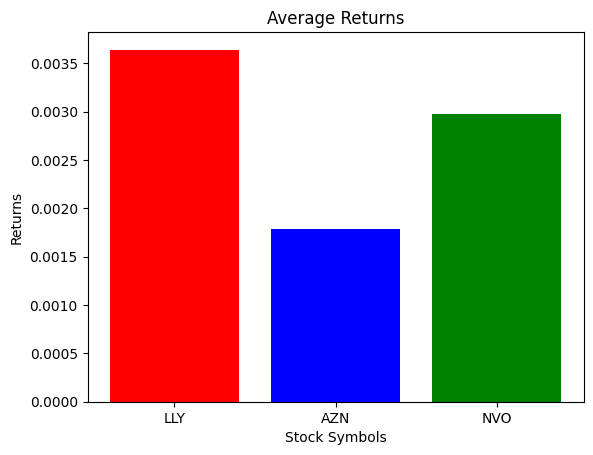

In [20]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (3,).

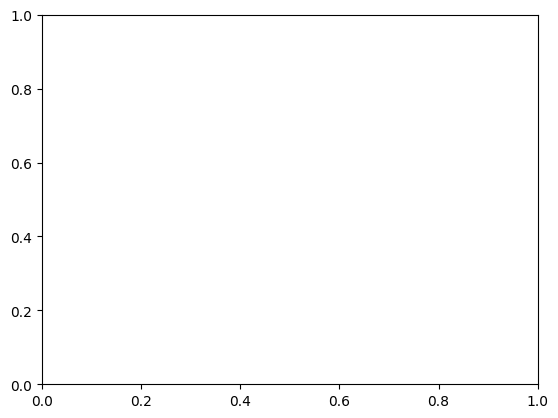

In [21]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')

plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

In [ ]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

## Risk vs Expected Return

Table: Risk vs Expected Returns


,Risk,Expected Returns
LLY,0.028117,0.003639
AZN,0.026493,0.001785
NVO,0.028884,0.002978


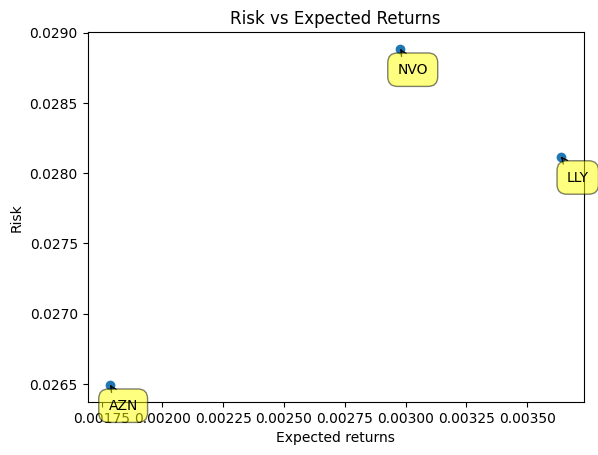

In [22]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables    